In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import re
import seaborn as sns


In [3]:
# Import filing data
df_sp500_data = pd.read_csv('Resources/SP500_filing_data.csv')

# Add Free Cash Flow Field
df_sp500_data['freecashflow'] = df_sp500_data.netcash_operating - df_sp500_data.ppe_purchases
df_sp500_data['prev_freecashflow'] = df_sp500_data.prev_netcash_operating - df_sp500_data.prev_ppe_purchases

#Add Filing Quarter field
fs_yr = []
fs_md = []

for x in range(len(df_sp500_data.filing_period)):
    fs_yr.append(re.search('^[\d]{4}',str(df_sp500_data.filing_period[x])).group(0))
    fs_md.append(re.search('[\d]{4}$',str(df_sp500_data.filing_period[x])).group(0))

qtr_bins = [0,331,630,930,1231]
qtr_labels = ['Q1', 'Q2', 'Q3', 'Q4']

fs_qtr = pd.cut(pd.to_numeric(fs_md, errors='coerce'), qtr_bins, labels=qtr_labels)

filing_qtr = []

for x in range(len(fs_qtr)):
    filing_qtr.append(fs_yr[x] + str(fs_qtr[x]))

df_sp500_data['filing_qtr'] = filing_qtr
df_sp500_data['filing_yr'] = fs_yr


In [4]:
# Group filing data by filing quarter
df_period_group = df_sp500_data.groupby('filing_qtr')
df_periods = pd.DataFrame()

df_periods['netincome_pct_chg'] = np.around((df_period_group.netincomeloss.sum() - df_period_group.prev_netincomeloss.sum())/df_period_group.prev_netincomeloss.sum(),3)
df_periods['retainedearnings_pct_chg'] = np.around((df_period_group.retainedearnings.sum() - df_period_group.prev_retainedearnings.sum())/df_period_group.prev_retainedearnings.sum(),3)
df_periods['freecashflow_pct_chg'] = np.around((df_period_group.freecashflow.sum() - df_period_group.prev_freecashflow.sum())/df_period_group.prev_freecashflow.sum(),3)
df_periods['netcash_operating_pct_chg'] = np.around((df_period_group.netcash_operating.sum() - df_period_group.prev_netcash_operating.sum())/df_period_group.netcash_operating.sum(),3)
df_periods['netcash_investing_pct_chg'] = np.around((df_period_group.netcash_investing.sum() - df_period_group.prev_netcash_investing.sum())/df_period_group.prev_netcash_investing.sum(),3)
df_periods['netcash_financing_pct_chg'] = np.around((df_period_group.netcash_financing.sum() - df_period_group.prev_netcash_financing.sum())/df_period_group.prev_netcash_financing.sum(),3)

df_periods

,netincome_pct_chg,retainedearnings_pct_chg,freecashflow_pct_chg,netcash_operating_pct_chg,netcash_investing_pct_chg,netcash_financing_pct_chg
filing_qtr,,,,,,
2014Q1,0.064,-0.028,-0.015,-0.009,0.036,-0.099
2014Q2,0.008,-0.032,-0.048,-0.049,0.266,0.009
2014Q3,0.726,0.100,-0.032,-0.021,0.172,-0.435
2014Q4,0.239,-0.022,0.243,0.185,1.185,-1.100
2015Q1,0.278,0.015,0.052,0.092,-0.117,-12.647
2015Q2,0.175,0.037,0.037,0.053,0.384,-1.652
2015Q3,-0.062,0.061,0.070,0.075,0.332,-0.917
2015Q4,0.279,0.035,0.537,0.296,1.069,-0.785
2016Q1,0.379,0.071,0.409,0.239,0.046,-0.983


In [9]:
# Import S&P500 Historical stock prices
df_sp500index = pd.read_csv('SPX_historical2018Q2.csv')

#Add Filing Quarter field
idx_mo = [d.split('/')[0] for d in df_sp500index.date]
idx_yr = [f"{d.split('/')[2]}" for d in df_sp500index.date]

qtr_bins = [0,3,6,9,12]
qtr_labels = ['Q1', 'Q2', 'Q3', 'Q4']

idx_qtr = pd.cut(pd.to_numeric(idx_mo, errors='coerce'), qtr_bins, labels=qtr_labels)

quarter = []

for x in range(len(idx_qtr)):
    quarter.append(idx_yr[x] + str(idx_qtr[x]))

df_sp500index['quarter'] = quarter
df_sp500index['idx_yr'] = idx_yr
df_sp500index['idx_qtr'] = idx_qtr

#df_sp500index = df_sp500index[pd.to_numeric(df_sp500index.idx_yr, errors='coerce') >= 2014]
df_sp500index.head()

,date,open,high,low,close,quarter,idx_yr,idx_qtr
0,6/29/2018,2727.13,2743.26,2718.03,2718.37,2018Q2,2018,Q2
1,6/28/2018,2698.69,2724.34,2691.99,2716.31,2018Q2,2018,Q2
2,6/27/2018,2728.45,2746.09,2699.38,2699.63,2018Q2,2018,Q2
3,6/26/2018,2722.12,2732.91,2715.60,2723.06,2018Q2,2018,Q2
4,6/25/2018,2742.94,2742.94,2698.67,2717.07,2018Q2,2018,Q2


In [10]:
# Group index by year/quarter
df_price_group = df_sp500index.groupby('quarter')

df_avgprice = pd.DataFrame()
df_avgprice['open'] = np.around(df_price_group.open.mean(),2)
df_avgprice['high'] = np.around(df_price_group.high.mean(),2)
df_avgprice['low'] = np.around(df_price_group.low.mean(),2)
df_avgprice['close'] = np.around(df_price_group.close.mean(),2)

df_avgprice

,open,high,low,close
quarter,,,,
2014Q1,1834.78,1843.12,1825.91,1834.87
2014Q2,1899.22,1905.70,1891.80,1900.37
2014Q3,1975.87,1982.57,1968.28,1976.05
2014Q4,2008.16,2019.00,1998.31,2009.34
2015Q1,2063.56,2073.78,2051.25,2063.69
2015Q2,2102.01,2110.42,2093.24,2101.83
2015Q3,2029.73,2042.11,2013.99,2027.20
2015Q4,2050.51,2061.83,2039.53,2052.31
2016Q1,1950.95,1963.81,1934.44,1951.22


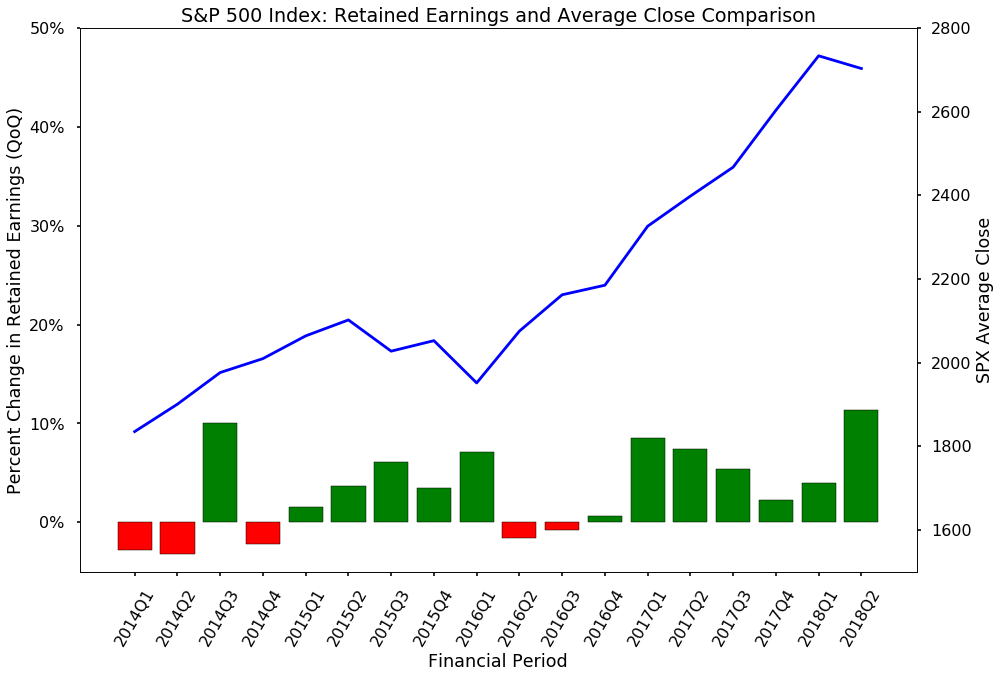

In [41]:
# Retained Earnings vs. Average Close Comparison
fig, ax1 = plt.subplots(figsize=(15,10))

# Create Bar Chart
bar_colors = []
for value in df_periods.retainedearnings_pct_chg:
    if value < 0:
        bar_colors.append('red')
    else:
        bar_colors.append('green')

plt.title('S&P 500 Index: Retained Earnings and Average Close Comparison')

ax1.set_xlabel('Financial Period')
ax1.set_ylabel('Percent Change in Retained Earnings (QoQ)')
ax1.bar(df_periods.index,
        df_periods.retainedearnings_pct_chg,
        color = bar_colors,
        edgecolor='black'
       )

ax1.tick_params(axis='x', labelrotation=60, labelright=True)
ax1.set_ylim(-0.05,.5)
ax1.set_yticklabels(['{:.0f}%'.format(x*100) for x in ax1.get_yticks()])

# Create Line Chart with same axis
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.plot(df_avgprice.index, df_avgprice.close, color='blue')

ax2.set_ylim(1500,2800)
#ax2.set_yticklabels(['${:.0f}'.format(x) for x in ax2.get_yticks()])
ax2.set_ylabel('SPX Average Close')

sns.set_context('poster')
fig.savefig('SP500_retainedearnings.png', bbox_inches='tight')
plt.show()

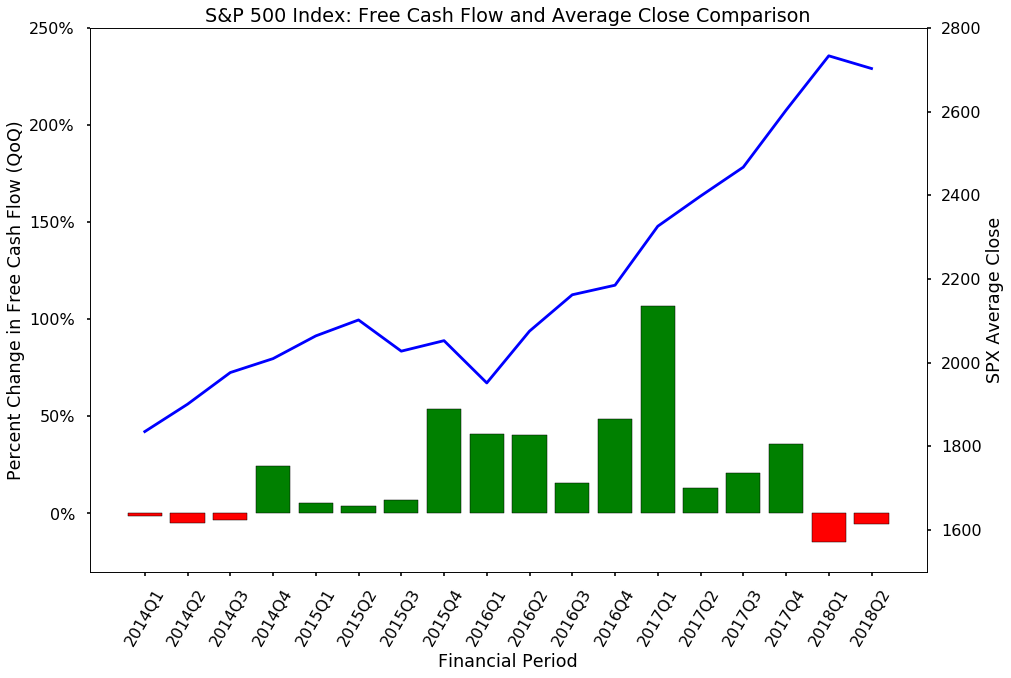

In [35]:
# Free Cash Flow vs. Average Close Comparison
fig, ax1 = plt.subplots(figsize=(15,10))

# Create Bar Chart
bar_colors = []
for value in df_periods.freecashflow_pct_chg:
    if value < 0:
        bar_colors.append('red')
    else:
        bar_colors.append('green')

plt.title('S&P 500 Index: Free Cash Flow and Average Close Comparison')

ax1.set_xlabel('Financial Period')
ax1.set_ylabel('Percent Change in Free Cash Flow (QoQ)')
ax1.bar(df_periods.index,
        df_periods.freecashflow_pct_chg,
        color = bar_colors,
        edgecolor='black'
       )

ax1.tick_params(axis='x', labelrotation=60, labelright=True)
ax1.set_ylim(-0.3,2.5)
ax1.set_yticklabels(['{:.0f}%'.format(x*100) for x in ax1.get_yticks()])

# Create Line Chart with same axis
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.plot(df_avgprice.index, df_avgprice.close, color='blue')

ax2.set_ylim(1500,2800)
#ax2.set_yticklabels(['${:.0f}'.format(x) for x in ax2.get_yticks()])
ax2.set_ylabel('SPX Average Close')

sns.set_context('poster')
fig.savefig('SP500_freecashflow.png', bbox_inches='tight')
plt.show()

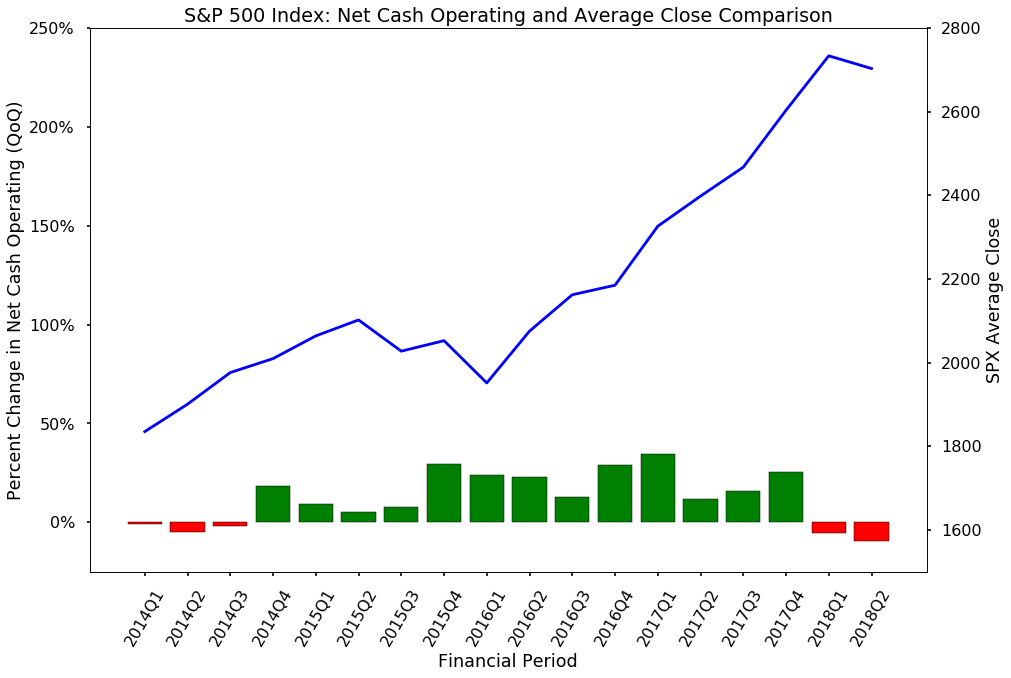

In [42]:
# Net Cash from Operating Activities vs. Average Close Comparison
fig, ax1 = plt.subplots(figsize=(15,10))

# Create Bar Chart
bar_colors = []
for value in df_periods.netcash_operating_pct_chg:
    if value < 0:
        bar_colors.append('red')
    else:
        bar_colors.append('green')

plt.title('S&P 500 Index: Net Cash Operating and Average Close Comparison')

ax1.set_xlabel('Financial Period')
ax1.set_ylabel('Percent Change in Net Cash Operating (QoQ)')
ax1.bar(df_periods.index,
        df_periods.netcash_operating_pct_chg,
        color = bar_colors,
        edgecolor='black'
       )

ax1.tick_params(axis='x', labelrotation=60, labelright=True)
ax1.set_ylim(-0.25,2.5)
ax1.set_yticklabels(['{:.0f}%'.format(x*100) for x in ax1.get_yticks()])

# Create Line Chart with same axis
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.plot(df_avgprice.index, df_avgprice.close, color='blue')

ax2.set_ylim(1500,2800)
#ax2.set_yticklabels(['${:.0f}'.format(x) for x in ax2.get_yticks()])
ax2.set_ylabel('SPX Average Close')

sns.set_context('poster')
fig.savefig('SP500_netcashoperating.png', bbox_inches='tight')
plt.show()

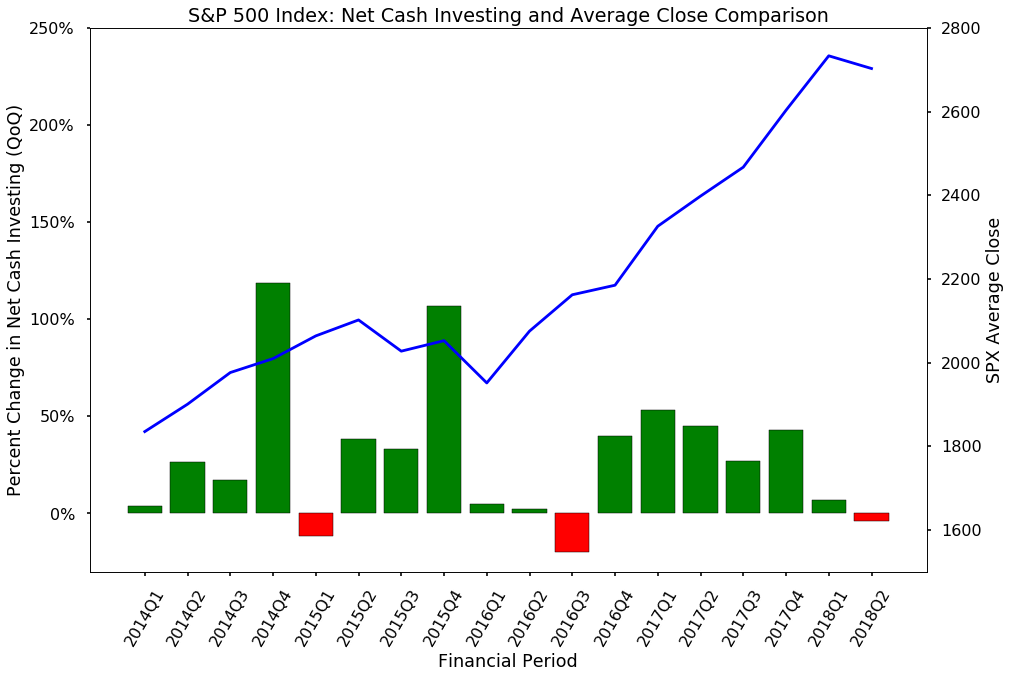

In [43]:
# Net Cash from Investing Activities vs. Average Close Comparison
fig, ax1 = plt.subplots(figsize=(15,10))

# Create Bar Chart
bar_colors = []
for value in df_periods.netcash_investing_pct_chg:
    if value < 0:
        bar_colors.append('red')
    else:
        bar_colors.append('green')

plt.title('S&P 500 Index: Net Cash Investing and Average Close Comparison')

ax1.set_xlabel('Financial Period')
ax1.set_ylabel('Percent Change in Net Cash Investing (QoQ)')
ax1.bar(df_periods.index,
        df_periods.netcash_investing_pct_chg,
        color = bar_colors,
        edgecolor='black'
       )

ax1.tick_params(axis='x', labelrotation=60, labelright=True)
ax1.set_ylim(-0.3,2.5)
ax1.set_yticklabels(['{:.0f}%'.format(x*100) for x in ax1.get_yticks()])

# Create Line Chart with same axis
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.plot(df_avgprice.index, df_avgprice.close, color='blue')

ax2.set_ylim(1500,2800)
#ax2.set_yticklabels(['${:.0f}'.format(x) for x in ax2.get_yticks()])
ax2.set_ylabel('SPX Average Close')

sns.set_context('poster')
fig.savefig('SP500_netcashinvesting.png', bbox_inches='tight')
plt.show()

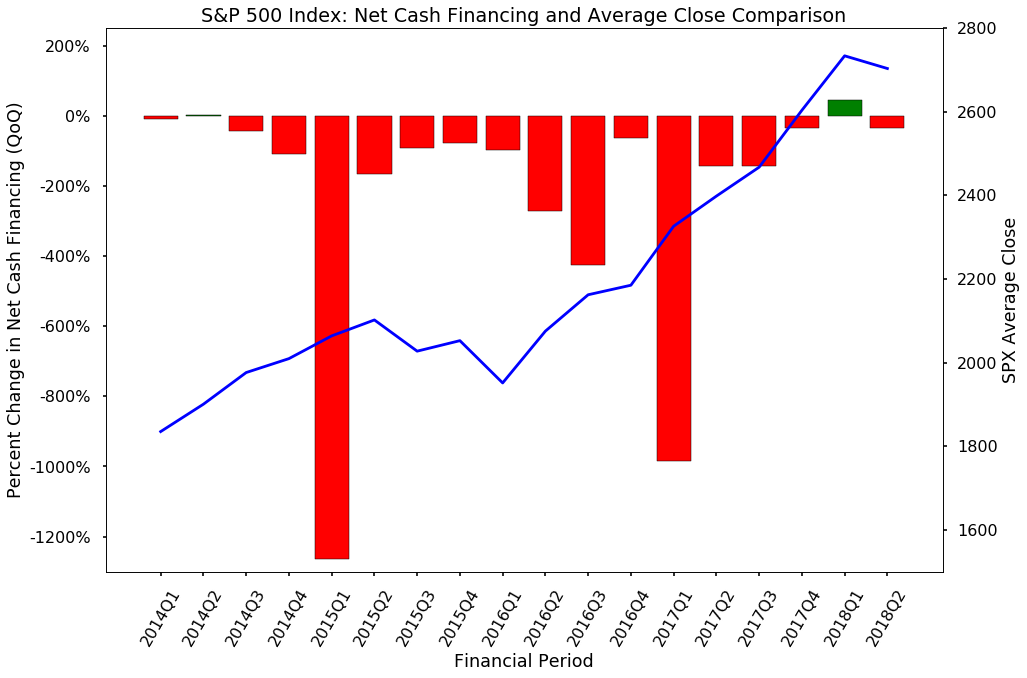

In [44]:
# Net Cash from Financing Activities vs. Average Close Comparison
fig, ax1 = plt.subplots(figsize=(15,10))

# Create Bar Chart
bar_colors = []
for value in df_periods.netcash_financing_pct_chg:
    if value < 0:
        bar_colors.append('red')
    else:
        bar_colors.append('green')

plt.title('S&P 500 Index: Net Cash Financing and Average Close Comparison')

ax1.set_xlabel('Financial Period')
ax1.set_ylabel('Percent Change in Net Cash Financing (QoQ)')
ax1.bar(df_periods.index,
        df_periods.netcash_financing_pct_chg,
        color = bar_colors,
        edgecolor='black'
       )

ax1.tick_params(axis='x', labelrotation=60, labelright=True)
ax1.set_ylim(-13,2.5)
ax1.set_yticklabels(['{:.0f}%'.format(x*100) for x in ax1.get_yticks()])

# Create Line Chart with same axis
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.plot(df_avgprice.index, df_avgprice.close, color='blue')

ax2.set_ylim(1500,2800)
#ax2.set_yticklabels(['${:.0f}'.format(x) for x in ax2.get_yticks()])
ax2.set_ylabel('SPX Average Close')

sns.set_context('poster')
fig.savefig('SP500_netcashfinancing.png', bbox_inches='tight')
plt.show()